**Name**:Abhishek Patel

**Enrollment No**: 23565001

**Dept**: MFS-AI

**email**: abhishek_p@mfs.iitr.ac.in

#Question 01
Generate a multi-armed bandit instance using the following code snippet: Please use the seed as the sum of digits in your enrollment number. In this problem, we implement ε-Greedy strategies and plot expected reward, E(rt), vs time, t. Let the total time horizon T be 10000, with exploration parameter ε = 0.1.

##Question: 01(a)
Implement εG1, εG2 and εG3 algorithms.

In [23]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt


class MultiArmedBandit:
    def __init__(self, arms,means):
        self.arms = arms
        self.true_means = means
        self.action_counts = np.zeros(arms)
        self.sum_rewards = np.zeros(arms)

    def pull_arm(self, arm):
        # Bernauli rewards
        reward=np.random.binomial(n=1,p=self.true_means[arm],size=1)
        self.action_counts[arm] += 1
        self.sum_rewards[arm] += reward
        return reward


#----------------Creating Epsilon Greedy 01 Algotithms(εG1)---------------------#

def epsilon_greedy1(epsilon,sampling_period,bandit):
    rewards = np.zeros(sampling_period)
    Best_arm=-1
    for t in range(sampling_period):
        if t<= epsilon*sampling_period:
            # Exploration: Randomly choose an arm
            chosen_arm = np.random.choice(bandit.arms)
        else:
            # Exploitation: Choose the arm with the highest estimated mean
            if Best_arm==-1:
              estimated_means = bandit.sum_rewards / np.maximum(bandit.action_counts, 1)
              chosen_arm = np.argmax(estimated_means)
              Best_arm=chosen_arm
            else:
              chosen_arm=Best_arm
        reward = bandit.pull_arm(chosen_arm)
        rewards[t] = reward

    return rewards


#----------------Creating Epsilon Greedy 02 Algotithms(εG2)---------------------#

def epsilon_greedy2(epsilon,sampling_period,bandit):
    rewards = np.zeros(sampling_period)

    for t in range(sampling_period):
        if t<= epsilon*sampling_period:
            # Exploration: Randomly choose an arm
            chosen_arm = np.random.choice(bandit.arms)
        else:
            # Exploitation: Choose the arm with the highest estimated mean
            estimated_means = bandit.sum_rewards / np.maximum(bandit.action_counts, 1)
            chosen_arm = np.argmax(estimated_means)

        reward = bandit.pull_arm(chosen_arm)
        rewards[t] = reward

    return rewards


#----------------Creating Epsilon Greedy 03 Algotithms(εG3)---------------------#

def epsilon_greedy3(epsilon,sampling_period,bandit):
    rewards = np.zeros(sampling_period)
    for t in range(sampling_period):
        if np.random.rand()<epsilon:
            chosen_arm = np.random.choice(bandit.arms)

        else:
            estimated_means = bandit.sum_rewards / np.maximum(bandit.action_counts, 1)
            chosen_arm = np.argmax(estimated_means)


        reward = bandit.pull_arm(chosen_arm)
        rewards[t] = reward

    return rewards


#----------------Creating Plotting function---------------------#

def plot_epsilon_greedy(avg_reward,label,title,pmin,pavg,pmax):
  """
  Created function to plot curve:
  Args:
  avg_reward:mean reward at given timestamp.
  label:tells about algo.
  title: tell about title about graph.
  pmin: min pobability among arms.
  pavg: avg probability among arms.
  pmax: avg probability of arms.

  """

  plt.plot(avg_reward,label=label)
  plt.xlim([-0.1*len(avg_reward), 1.1*len(avg_reward)])
  plt.axhline(y=pmin,xmin=1/12,xmax=11/12,label="Min reward ($P_{min}$)",color=(0.2,0.7,0.6))
  plt.axhline(y=pavg,xmin=1/12,xmax=11/12,label="Mean reward ($P_{avg}$)",color=(0.8,0.3,0.6))
  plt.axhline(y=pmax,xmin=1/12,xmax=11/12,label="Max reward ($P_{max}$)",color=(0.6,0.5,0.1))
  plt.xlabel('Time')
  plt.ylabel('Expected reward (E[$r^t$])')
  plt.title(title)
  plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
  plt.show()


#----------------Main execution function---------------------#

def perform_experiment(epoch,algo,epsilon,sampling_period,arm,means):
  """
  Algo 1: epsilon greedy 1
  Algo 2: epsilon greedy 2
  Algo 3: epsilon greedy 3

  """
  outcomes=np.zeros(shape=(epoch,sampling_period))
  if algo==1:
    print("εG1 algorithm is Running....")
    for i in range(epoch):
      bandit=MultiArmedBandit(arm,means)
      outcomes[i,:]=epsilon_greedy1(epsilon,sampling_period,bandit)
    print("εG1 algorithm Completed.")


  elif algo==2:
    print("εG2 algorithm is Running....")
    for i in range(epoch):
      bandit=MultiArmedBandit(10,means)
      outcomes[i,:]=epsilon_greedy2(epsilon,sampling_period,bandit)

    print("εG2 algorithm Completed.")


  elif algo==3:
    print("εG3 algorithm is Running....")
    for i in range(epoch):
      bandit=MultiArmedBandit(10,means)
      outcomes[i,:]=epsilon_greedy3(epsilon,sampling_period,bandit)
    print("εG3 algorithm Completed.")
  else:
    return None
  return outcomes.mean(axis=0)


#--------------------------------End-------------------------------------#



##Question: 01(b)

Plot E(rt) vs t for each of the above algorithms.

εG1 algorithm is Running....
εG1 algorithm Completed.
Your wait is over, here is plot for εG1.


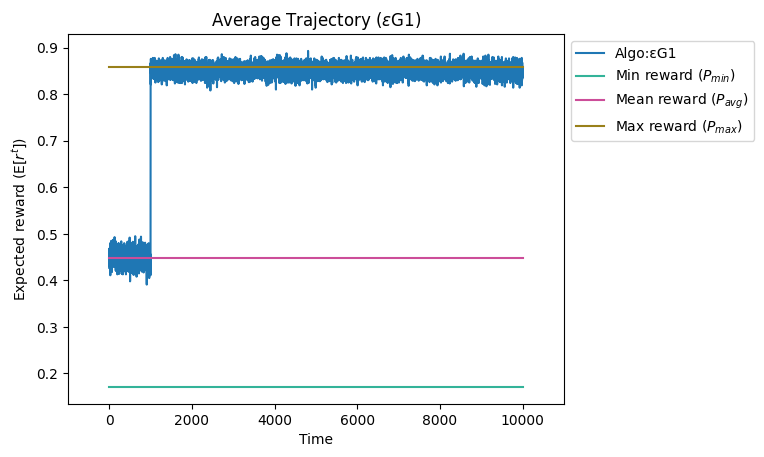

εG2 algorithm is Running....
εG2 algorithm Completed.
Your wait is over, here is plot for εG2.


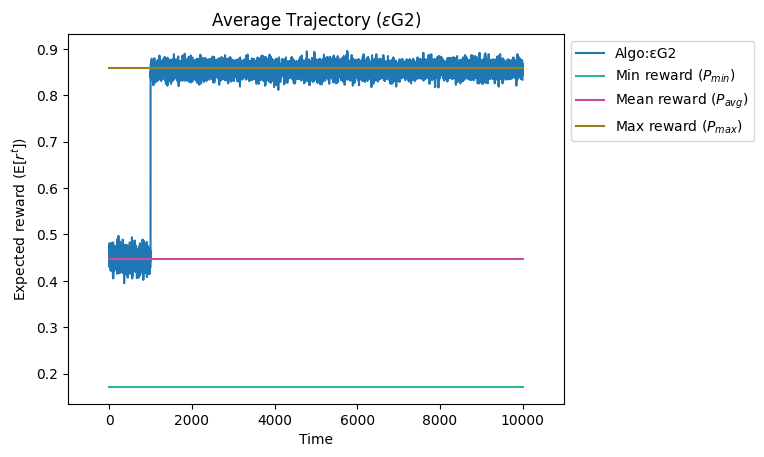

εG3 algorithm is Running....
εG3 algorithm Completed.
Your wait is over, here is plot for εG3.


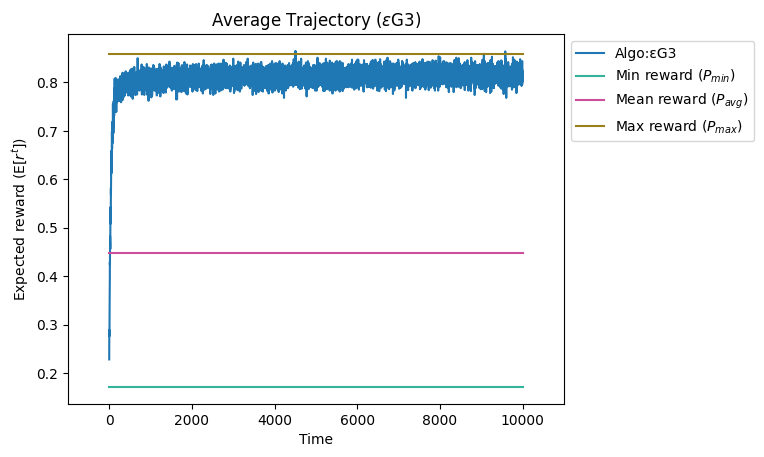

In [24]:

if __name__=='__main__':

  # Enrollment:23565001 (sum of digits=22)
  random_seed=22
  np.random.seed(random_seed)
  # Generating true means of arms:
  no_of_arms=10
  true_means=np.random.uniform(0,1,no_of_arms)
  Pmin=min(true_means)
  Pmax=max(true_means)
  Pavg=true_means.mean()




#--------------plotting Epsilon greedy01 (εG1)---------------#
  avg_reward_1=perform_experiment(epoch=1000,algo=1,epsilon=0.1,sampling_period=10000,arm=no_of_arms,means=true_means)
  print("Your wait is over, here is plot for εG1.")
  plot_epsilon_greedy(avg_reward_1,"Algo:εG1","Average Trajectory ($\epsilon$G1)",Pmin,Pavg,Pmax)




#--------------plotting Epsilon greedy02 (εG2)---------------#
  avg_reward_2=perform_experiment(epoch=1000,algo=2,epsilon=0.1,sampling_period=10000,arm=no_of_arms,means=true_means)
  print("Your wait is over, here is plot for εG2.")
  plot_epsilon_greedy(avg_reward_2,"Algo:εG2","Average Trajectory ($\epsilon$G2)",Pmin,Pavg,Pmax)




#--------------plotting Epsilon greedy03 (εG3)---------------#
  avg_reward_3=perform_experiment(epoch=1000,algo=3,epsilon=0.1,sampling_period=10000,arm=no_of_arms,means=true_means)
  print("Your wait is over, here is plot for εG3.")
  plot_epsilon_greedy(avg_reward_3,"Algo:εG3","Average Trajectory ($\epsilon$G3)",Pmin,Pavg,Pmax)


#Question 02
Repeat Q1 when each bandit gives reward from normal distribution with variance 1 and the mean
same as above

In [25]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt


class MultiArmedBandit:
    def __init__(self, arms,means):
        self.arms = arms
        self.true_means = means
        self.action_counts = np.zeros(arms)
        self.sum_rewards = np.zeros(arms)

    def pull_arm(self, arm):
        # normal rewards
        reward=np.random.normal(loc=self.true_means[arm],scale=1,size=1)
        self.action_counts[arm] += 1
        self.sum_rewards[arm] += reward
        return reward


#----------------Creating Epsilon Greedy 01 Algotithms(εG1)---------------------#

def epsilon_greedy1(epsilon,sampling_period,bandit):
    rewards = np.zeros(sampling_period)
    Best_arm=-1
    for t in range(sampling_period):
        if t<= epsilon*sampling_period:
            # Exploration: Randomly choose an arm
            chosen_arm = np.random.choice(bandit.arms)
        else:
            # Exploitation: Choose the arm with the highest estimated mean
            if Best_arm==-1:
              estimated_means = bandit.sum_rewards / np.maximum(bandit.action_counts, 1)
              chosen_arm = np.argmax(estimated_means)
              Best_arm=chosen_arm
            else:
              chosen_arm=Best_arm
        reward = bandit.pull_arm(chosen_arm)
        rewards[t] = reward

    return rewards


#----------------Creating Epsilon Greedy 02 Algotithms(εG2)---------------------#

def epsilon_greedy2(epsilon,sampling_period,bandit):
    rewards = np.zeros(sampling_period)

    for t in range(sampling_period):
        if t<= epsilon*sampling_period:
            # Exploration: Randomly choose an arm
            chosen_arm = np.random.choice(bandit.arms)
        else:
            # Exploitation: Choose the arm with the highest estimated mean
            estimated_means = bandit.sum_rewards / np.maximum(bandit.action_counts, 1)
            chosen_arm = np.argmax(estimated_means)

        reward = bandit.pull_arm(chosen_arm)
        rewards[t] = reward

    return rewards


#----------------Creating Epsilon Greedy 03 Algotithms(εG3)---------------------#

def epsilon_greedy3(epsilon,sampling_period,bandit):
    rewards = np.zeros(sampling_period)
    for t in range(sampling_period):
        if np.random.rand()<epsilon:
            chosen_arm = np.random.choice(bandit.arms)

        else:
            estimated_means = bandit.sum_rewards / np.maximum(bandit.action_counts, 1)
            chosen_arm = np.argmax(estimated_means)


        reward = bandit.pull_arm(chosen_arm)
        rewards[t] = reward

    return rewards


#----------------Creating Plotting function---------------------#

def plot_epsilon_greedy(avg_reward,label,title,pmin,pavg,pmax):
  """
  Created function to plot curve:
  Args:
  avg_reward:mean reward at given timestamp.
  label:tells about algo.
  title: tell about title about graph.
  pmin: min pobability among arms.
  pavg: avg probability among arms.
  pmax: avg probability of arms.

  """

  plt.plot(avg_reward,label=label)
  plt.xlim([-0.1*len(avg_reward), 1.1*len(avg_reward)])
  plt.axhline(y=pmin,xmin=1/12,xmax=11/12,label="Min reward ($P_{min}$)",color=(0.2,0.7,0.6))
  plt.axhline(y=pavg,xmin=1/12,xmax=11/12,label="Mean reward ($P_{avg}$)",color=(0.8,0.3,0.6))
  plt.axhline(y=pmax,xmin=1/12,xmax=11/12,label="Max reward ($P_{max}$)",color=(0.6,0.5,0.1))
  plt.xlabel('Time')
  plt.ylabel('Expected reward (E[$r^t$])')
  plt.title(title)
  plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
  plt.show()


#----------------Main execution function---------------------#

def perform_experiment(epoch,algo,epsilon,sampling_period,arm,means):
  """
  Algo 1: epsilon greedy 1
  Algo 2: epsilon greedy 2
  Algo 3: epsilon greedy 3

  """
  outcomes=np.zeros(shape=(epoch,sampling_period))
  if algo==1:
    print("εG1 algorithm is Running....")
    for i in range(epoch):
      bandit=MultiArmedBandit(arm,means)
      outcomes[i,:]=epsilon_greedy1(epsilon,sampling_period,bandit)
    print("εG1 algorithm Completed.")


  elif algo==2:
    print("εG2 algorithm is Running....")
    for i in range(epoch):
      bandit=MultiArmedBandit(arm,means)
      outcomes[i,:]=epsilon_greedy2(epsilon,sampling_period,bandit)

    print("εG2 algorithm Completed.")


  elif algo==3:
    print("εG3 algorithm is Running....")
    for i in range(epoch):
      bandit=MultiArmedBandit(arm,means)
      outcomes[i,:]=epsilon_greedy3(epsilon,sampling_period,bandit)
    print("εG3 algorithm Completed.")
  else:
    return None
  return outcomes.mean(axis=0)


#--------------------------------End-------------------------------------#



εG1 algorithm is Running....
εG1 algorithm Completed.
Your wait is over, here is plot for εG1.


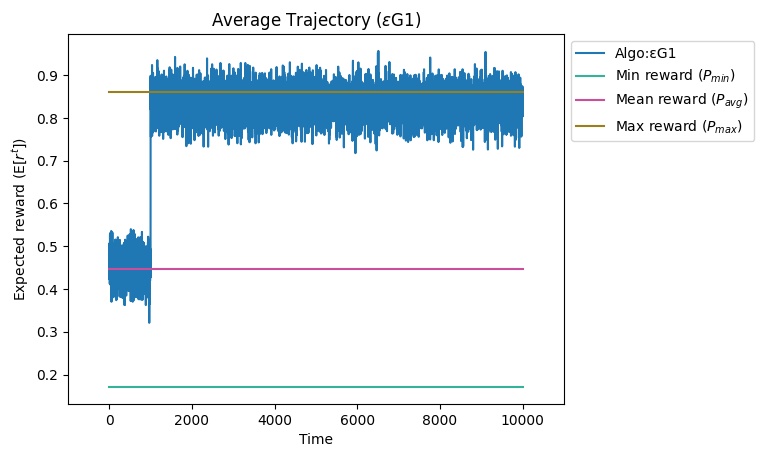

εG2 algorithm is Running....
εG2 algorithm Completed.
Your wait is over, here is plot for εG2.


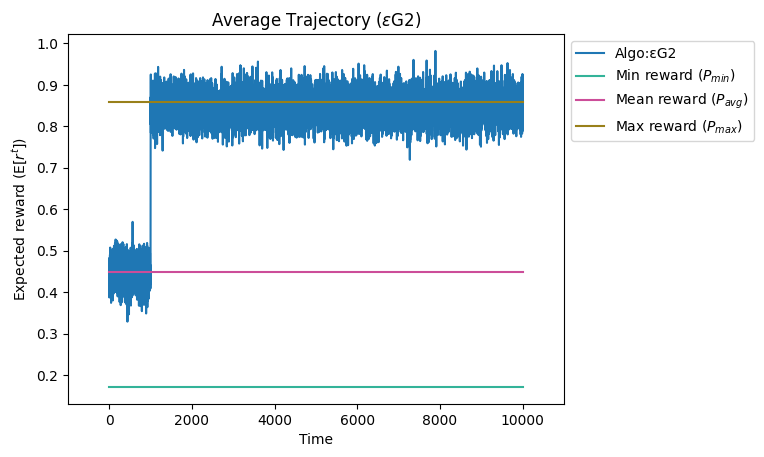

εG3 algorithm is Running....
εG3 algorithm Completed.
Your wait is over, here is plot for εG3.


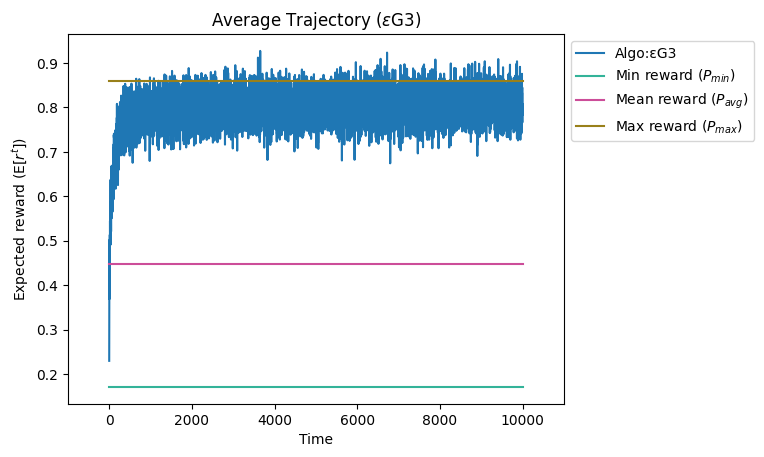

In [26]:

if __name__=='__main__':

  # Enrollment:23565001 (sum of digits=22)
  random_seed=22
  np.random.seed(random_seed)
  # Generating true means of arms:
  no_of_arms=10
  true_means=np.random.uniform(0,1,no_of_arms)
  Pmin=min(true_means)
  Pmax=max(true_means)
  Pavg=true_means.mean()




#--------------plotting Epsilon greedy01 (εG1)---------------#
  avg_reward_1=perform_experiment(epoch=1000,algo=1,epsilon=0.1,sampling_period=10000,arm=no_of_arms,means=true_means)
  print("Your wait is over, here is plot for εG1.")
  plot_epsilon_greedy(avg_reward_1,"Algo:εG1","Average Trajectory ($\epsilon$G1)",Pmin,Pavg,Pmax)




#--------------plotting Epsilon greedy02 (εG2)---------------#
  avg_reward_2=perform_experiment(epoch=1000,algo=2,epsilon=0.1,sampling_period=10000,arm=no_of_arms,means=true_means)
  print("Your wait is over, here is plot for εG2.")
  plot_epsilon_greedy(avg_reward_2,"Algo:εG2","Average Trajectory ($\epsilon$G2)",Pmin,Pavg,Pmax)




#--------------plotting Epsilon greedy03 (εG3)---------------#
  avg_reward_3=perform_experiment(epoch=1000,algo=3,epsilon=0.1,sampling_period=10000,arm=no_of_arms,means=true_means)
  print("Your wait is over, here is plot for εG3.")
  plot_epsilon_greedy(avg_reward_3,"Algo:εG3","Average Trajectory ($\epsilon$G3)",Pmin,Pavg,Pmax)
